In [1]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import json
import urllib3
import re
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [2]:
http = urllib3.PoolManager()

# Using GET request protocol in urllib3 library to extract the json structured Technology threads from 4CHAN website
tech = http.request('GET', 'https://a.4cdn.org/g/catalog.json')
tech = json.loads(tech.data.decode('utf-8'))

In [3]:
# Using GET request protocol in urllib3 library to extract the json structured TV&Film threads from 4CHAN website
tv = http.request('GET', 'https://a.4cdn.org/tv/catalog.json')
tv = json.loads(tv.data.decode('utf-8'))

In [4]:
# Using GET request protocol in urllib3 library to extract the json structured Food&Cooking threads from 4CHAN website
cook = http.request('GET', 'https://a.4cdn.org/ck/catalog.json')
cook = json.loads(cook.data.decode('utf-8'))

In [5]:
# Using GET request protocol in urllib3 library to extract the json structured Literature threads from 4CHAN website
lit = http.request('GET', 'https://a.4cdn.org/lit/catalog.json')
lit = json.loads(lit.data.decode('utf-8'))

In [6]:
#Extracting Technology data and converting it into a dataframe
tech_data = {'thread_id': [], 'name': [],'original_post': [], 'time': [], 'num_replies': [], 'last_5_reply_text':[], 'bumplimit': [] }
i= 0
while i < len(tech):
    for thread in tech[i]['threads']:
        tech_data['thread_id'].append(thread.get('no',' ')) 
        tech_data['name'].append(thread.get('name',' ')) 
        tech_data['original_post'].append(thread.get('com',' ')) 
        tech_data['time'].append(thread.get('time',' '))
        tech_data['num_replies'].append(thread.get('replies',' '))
        tech_data['bumplimit'].append(thread.get('bumplimit',' '))
        if thread.get('last_replies'):
            for reply in thread['last_replies']:
                text = []
                text.append(reply.get('com',' '))
            text = ' '.join(text)
        tech_data['last_5_reply_text'].append(text)
        
    i+=1
tech_data = pd.DataFrame(tech_data)
post=[]
#Cleaning Original Post
for com in tech_data.original_post:
    bs(com)
    text = re.sub(r'http\S+', '', com)
    text = re.sub(r"<[^>]*>", " ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'(gt)', '', text)
    post.append(text)
tech_data['original_post'] = post
rep=[]
#Cleaning Replies
for com in tech_data.last_5_reply_text:
    bs(com)
    text = re.sub(r'http\S+', '', com)
    text = re.sub(r"<[^>]*>", " ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'(gt)', '', text)
    rep.append(text)
tech_data['last_5_reply_text'] = rep

#Added new column to represent channel
tech_data['channel'] = 1

#Convert Date and Time to get hour of the day
import datetime
dt = []
for ts in tech_data.time:
    d = datetime.datetime.fromtimestamp(int(ts)).strftime('%H')
    dt.append(d)
tech_data['hour_of_the_day'] = dt
tech_data.head()
    


,thread_id,name,original_post,time,num_replies,last_5_reply_text,bumplimit,channel,hour_of_the_day
0,51971506,Anonymous,The g Wiki g is NOT your personal tech support...,1450659832,1,,,1,20
1,75866346,Anonymous,What steps are you taking to stop the botnet...,1589252391,1,75866346 why does he pronounce gnu linux li...,0,1,22
2,75863189,Anonymous,What is the best DAW in your opinion and why P...,1589235727,17,75863189,0,1,18
3,75865748,Anonymous,Laptop sticker thread post em bois,1589248902,14,75865883 Unironically kill yourself you gin...,0,1,22
4,75862534,Anonymous,Installation Scripts quality video output prof...,1589232398,22,Wo having branded the manual letter by letter ...,0,1,17


In [7]:
#Extracting TV&Film data and converting it into a dataframe
tv_data = {'thread_id': [], 'name': [],'original_post': [], 'time': [], 'num_replies': [], 'last_5_reply_text':[], 'bumplimit': [] }
i= 0
while i < len(tv):
    for thread in tv[i]['threads']:
        tv_data['thread_id'].append(thread.get('no',' ')) 
        tv_data['name'].append(thread.get('name',' ')) 
        tv_data['original_post'].append(thread.get('com',' ')) 
        tv_data['time'].append(thread.get('time',' '))
        tv_data['num_replies'].append(thread.get('replies',' '))
        tv_data['bumplimit'].append(thread.get('bumplimit',' '))
        if thread.get('last_replies'):
            for reply in thread['last_replies']:
                text = []
                text.append(reply.get('com',' '))
            text = ' '.join(text)
        tv_data['last_5_reply_text'].append(text)
        
    i+=1
tv_data = pd.DataFrame(tv_data)
post=[]
for com in tv_data.original_post:
    bs(com)
    text = re.sub(r'http\S+', '', com)
    text = re.sub(r"<[^>]*>", " ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'(gt)', '', text)
    post.append(text)
tv_data['original_post'] = post
rep=[]
for com in tv_data.last_5_reply_text:
    bs(com)
    text = re.sub(r'http\S+', '', com)
    text = re.sub(r"<[^>]*>", " ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'(gt)', '', text)
    rep.append(text)
tv_data['last_5_reply_text'] = rep
tv_data['channel'] = 2
dt = []
for ts in tv_data.time:
    d = datetime.datetime.fromtimestamp(int(ts)).strftime('%H')
    dt.append(d)
tv_data['hour_of_the_day'] = dt
tv_data.head()


,thread_id,name,original_post,time,num_replies,last_5_reply_text,bumplimit,channel,hour_of_the_day
0,133618496,Anonymous,how can movies be real if our eyes aren 039 t ...,1589247691,23,133619138 he look like a 40 something dude ...,0,2,21
1,133621826,Anonymous,NNNNNNOOOOOOOOOOOOOOOOOOOOOOO 1 NOT THE HECK...,1589253058,0,133619138 he look like a 40 something dude ...,0,2,23
2,133614716,Anonymous,How do we fix Quibi,1589242117,102,133618060 quot Uh oh quot There 039 s a re...,0,2,20
3,133610304,Anonymous,what are the oldest tv related memes you have,1589235948,225,133615756 my favorite was the extremely lon...,0,2,18
4,133616429,Anonymous,ITT Impressively bad special effects,1589244646,169,133621726 Clearly I have run across some ki...,0,2,20


In [8]:
#Extracting Cooking data and converting it into a dataframe
cook_data = {'thread_id': [], 'name': [],'original_post': [], 'time': [], 'num_replies': [], 'last_5_reply_text':[], 'bumplimit': [] }
i= 0
while i < len(cook):
    for thread in cook[i]['threads']:
        cook_data['thread_id'].append(thread.get('no',' ')) 
        cook_data['name'].append(thread.get('name',' ')) 
        cook_data['original_post'].append(thread.get('com',' ')) 
        cook_data['time'].append(thread.get('time',' '))
        cook_data['num_replies'].append(thread.get('replies',' '))
        cook_data['bumplimit'].append(thread.get('bumplimit',' '))
        if thread.get('last_replies'):
            for reply in thread['last_replies']:
                text = []
                text.append(reply.get('com',' '))
            text = ' '.join(text)
        cook_data['last_5_reply_text'].append(text)
        
    i+=1
cook_data = pd.DataFrame(cook_data)
post=[]
for com in cook_data.original_post:
    bs(com)
    text = re.sub(r'http\S+', '', com)
    text = re.sub(r"<[^>]*>", " ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'(gt)', '', text)
    post.append(text)
cook_data['original_post'] = post
rep=[]
for com in cook_data.last_5_reply_text:
    bs(com)
    text = re.sub(r'http\S+', '', com)
    text = re.sub(r"<[^>]*>", " ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'(gt)', '', text)
    rep.append(text)
cook_data['last_5_reply_text'] = rep
cook_data['channel'] = 3
dt = []
for ts in cook_data.time:
    d = datetime.datetime.fromtimestamp(int(ts)).strftime('%H')
    dt.append(d)
cook_data['hour_of_the_day'] = dt

cook_data.head()


,thread_id,name,original_post,time,num_replies,last_5_reply_text,bumplimit,channel,hour_of_the_day
0,14069315,Anonymous,Watch me either fail or succeed in doing this ...,1589222811,64,14069877 i think you might have had too muc...,0,3,14
1,14071202,Anonymous,This is the new normal Waiters btfo,1589248638,21,14071557 Its a decently sized chain dude Ne...,0,3,21
2,14065851,Anonymous,God I LOVE Whiskey What whiskey do you prefer ck,1589157876,44,14071501 I 039 m quite sure the 12 year old...,0,3,20
3,14070773,Anonymous,what 039 s the comfiest bean based soup stew y...,1589243011,6,14070773 beans the simpler and hotter the b...,0,3,20
4,14071524,Anonymous,Well,1589252262,4,14071554 Dry Easy less residual sugars Use ...,0,3,22


In [9]:
#Extracting Literature data and converting it into a dataframe
lit_data = {'thread_id': [], 'name': [],'original_post': [], 'time': [], 'num_replies': [], 'last_5_reply_text':[], 'bumplimit': [] }
i= 0
while i < len(lit):
    for thread in lit[i]['threads']:
        lit_data['thread_id'].append(thread.get('no',' ')) 
        lit_data['name'].append(thread.get('name',' ')) 
        lit_data['original_post'].append(thread.get('com',' ')) 
        lit_data['time'].append(thread.get('time',' '))
        lit_data['num_replies'].append(thread.get('replies',' '))
        lit_data['bumplimit'].append(thread.get('bumplimit',' '))
        if thread.get('last_replies'):
            for reply in thread['last_replies']:
                text = []
                text.append(reply.get('com',' '))
            text = ' '.join(text)
        lit_data['last_5_reply_text'].append(text)
        
    i+=1
lit_data = pd.DataFrame(lit_data)
post=[]
for com in lit_data.original_post:
    bs(com)
    text = re.sub(r'http\S+', '', com)
    text = re.sub(r"<[^>]*>", " ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'(gt)', '', text)
    post.append(text)
lit_data['original_post'] = post
rep=[]
for com in lit_data.last_5_reply_text:
    bs(com)
    text = re.sub(r'http\S+', '', com)
    text = re.sub(r"<[^>]*>", " ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'(gt)', '', text)
    rep.append(text)
lit_data['last_5_reply_text'] = rep
lit_data['channel'] = 4
dt = []
for ts in lit_data.time:
    d = datetime.datetime.fromtimestamp(int(ts)).strftime('%H')
    dt.append(d)
lit_data['hour_of_the_day'] = dt



In [10]:
#Calculating average number of words in Technology posts
tech_data["num_words"] = tech_data["original_post"].apply(lambda x: len(str(x).split()))
tech_data.head()
print("Average number of words per total Technology posts is ", sum(tech_data.num_words)/len(tech_data))

Average number of words per total Technology posts is  49.11333333333334


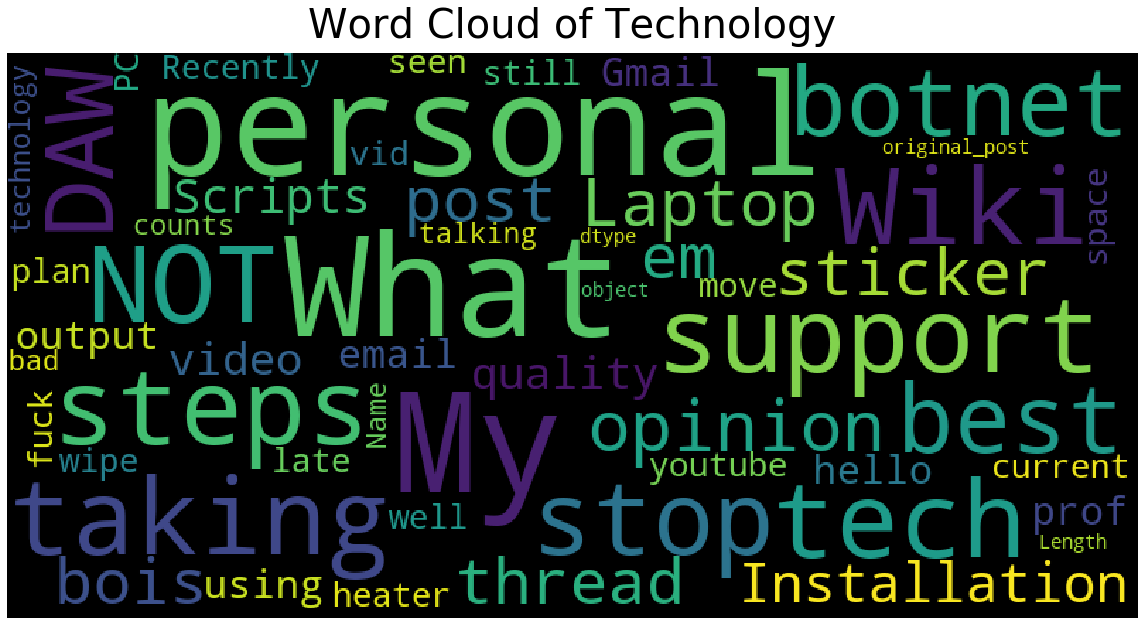

In [11]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(16.0,12.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'It', 'NOT', 'said', 'sure', 'will'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(tech_data["original_post"], title="Word Cloud of Technology")


In [12]:
#Calculating average number of words in TV&Film posts
tv_data["num_words"] = tv_data["original_post"].apply(lambda x: len(str(x).split()))
print("Average number of words per total TV&Film posts is ", sum(tv_data.num_words)/len(tv_data))

Average number of words per total TV&Film posts is  18.08843537414966


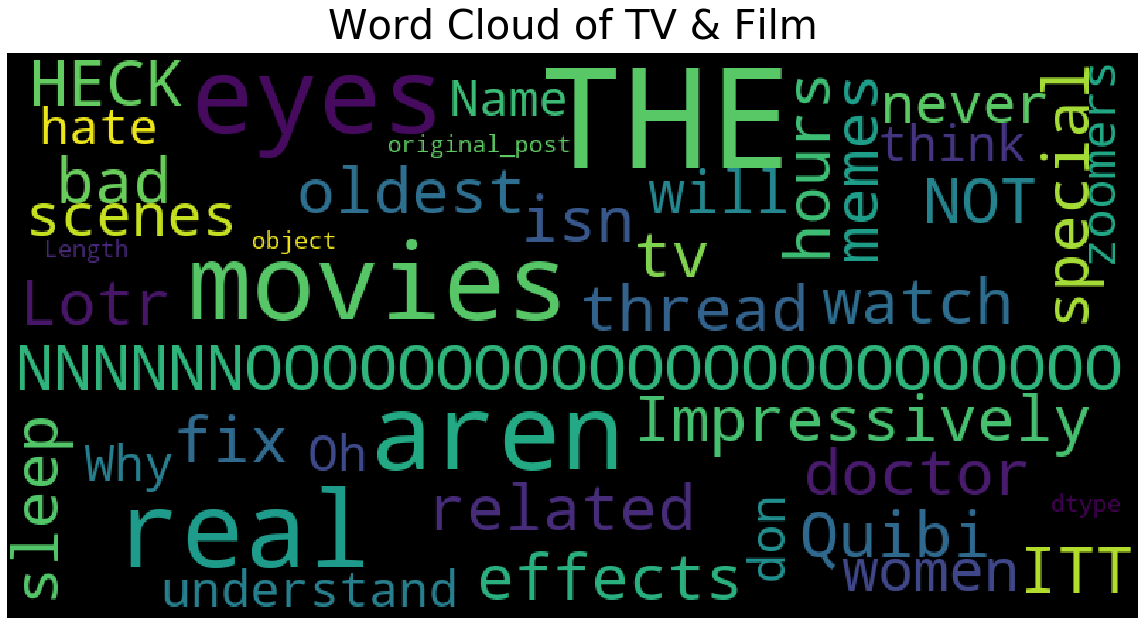

In [13]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(16.0,12.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'You', 'ME', 'said', 'did', 'can'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(tv_data["original_post"], title="Word Cloud of TV & Film")


In [14]:
#Calculating average number of words in Cooking posts
cook_data["num_words"] = cook_data["original_post"].apply(lambda x: len(str(x).split()))
print("Average number of words per total Cooking posts is ", sum(cook_data.num_words)/len(cook_data))

Average number of words per total Cooking posts is  26.466666666666665


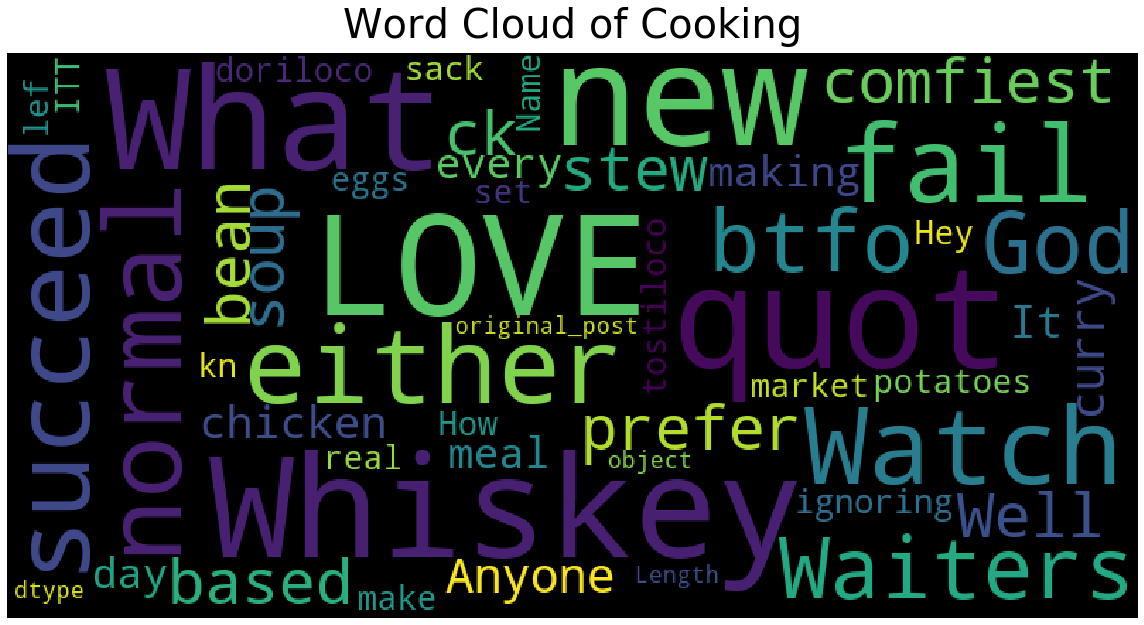

In [15]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(16.0,12.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'It', 'NOT', 'said', 'sure', 'will'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(cook_data["original_post"], title="Word Cloud of Cooking")


In [16]:
#Calculating average number of words in Literature posts
lit_data["num_words"] = lit_data["original_post"].apply(lambda x: len(str(x).split()))
print("Average number of words per total Literature posts is ", sum(lit_data.num_words)/len(lit_data))

Average number of words per total Literature posts is  38.311258278145694


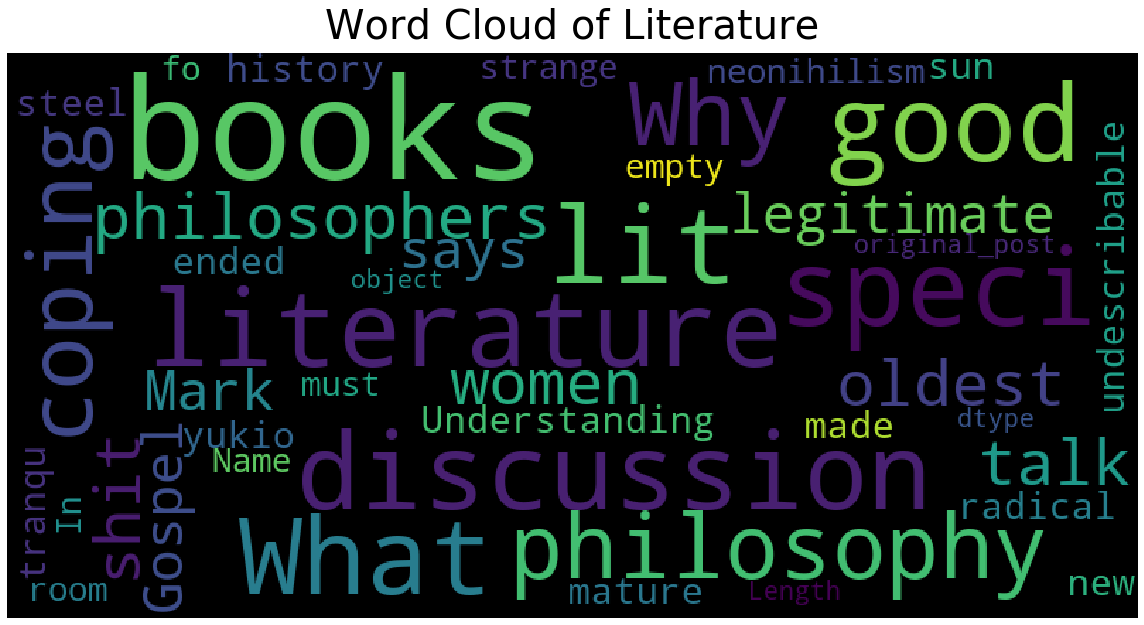

In [17]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(16.0,12.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(lit_data["original_post"], title="Word Cloud of Literature")


#AVERAGE WORDS/POST
We Find that the average number of words per post is highest for Tech posts with 49 words, Least is for Tv and Films with 18 words. The Cooking Posts average is 26 words and Literature is 38 words. 
Average words is a distinguishing feature amongst the 4 channels. We would imagine that Tv and Films/Literature posts would be more verbose but Tech posts are clearly ahead of rest of the posts. It shows people want to show their technical knowledge/ are keen to learn more by posing more questions on 4Chan.
#WORDCLOUD
The distinguishing words are very clear. 
Technogy posts have repeating words such as botnet, installation etc. which are primarily related to technology. We also find many abuses in the technology posts than other posts.
In TV & Films posts we see words such as movies, LOTR, Bad Scenes etc.
In Cooking posts we find a lot of discussions on Chicken, Whiskey, Bean Soup, Waiters etc.
Literature posts are about discussions on philosophy, neonihilism, coping etc.

In [18]:
#Joining all the data together
full_df = pd.concat([tech_data, tv_data, cook_data, lit_data], ignore_index=True)

#Removing frequently apprearing number 039,
#which is part of HTML encoded text and also remove all the single letters and numbers
rep=[]
for com in full_df.original_post:
    text = re.sub(r'(039)', '', com)
    text = re.sub(r'\b[a-zA-Z0-9]{1}\b', '', text)
    rep.append(text)
full_df['original_post'] = rep

full_df.head()

,thread_id,name,original_post,time,num_replies,last_5_reply_text,bumplimit,channel,hour_of_the_day,num_words
0,51971506,Anonymous,The Wiki is NOT your personal tech support t...,1450659832,1,,,1,20,72
1,75866346,Anonymous,What steps are you taking to stop the botnet...,1589252391,1,75866346 why does he pronounce gnu linux li...,0,1,22,193
2,75863189,Anonymous,What is the best DAW in your opinion and why P...,1589235727,17,75863189,0,1,18,59
3,75865748,Anonymous,Laptop sticker thread post em bois,1589248902,14,75865883 Unironically kill yourself you gin...,0,1,22,6
4,75862534,Anonymous,Installation Scripts quality video output prof...,1589232398,22,Wo having branded the manual letter by letter ...,0,1,17,43


In [19]:
#Word Frequency plot
from collections import defaultdict
tech_df = full_df[full_df["channel"]==1]
tv_df = full_df[full_df["channel"]==2]
cook_df = full_df[full_df["channel"]==3]
lit_df = full_df[full_df["channel"]==4]

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from technology data ##
freq_dict = defaultdict(int)
for sent in tech_df["original_post"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from tv data ##
freq_dict = defaultdict(int)
for sent in tv_df["original_post"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

## Get the bar chart from cook data ##
freq_dict = defaultdict(int)
for sent in cook_df["original_post"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace3 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

## Get the bar chart from Literature data ##
freq_dict = defaultdict(int)
for sent in lit_df["original_post"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace4 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

# Creating four subplots
fig = tools.make_subplots(rows=1, cols=4, vertical_spacing=0.04,
                          subplot_titles=["Technology", 
                                          "Tv & Films",
                                        "Cooking",
                                         "Literature"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Once again we find that the Technology posts contain a lot of abuses that other posts. In the lockdown period, people are more attached to the gadgets and using technology all the time. Any small lag or fail in the device is expressed with abuse. 
The word frequency plot condenses the frequently apprearing words in the posts. The words that frequently appear and are unique to the channels are related to the posts. This also shows that TF-IDF Vectorizer may be a good classifier for this multiclass classifcation model.

In [20]:
## Get the bar chart from technology data ##
freq_dict = defaultdict(int)
for sent in tech_df["original_post"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from tv data ##
freq_dict = defaultdict(int)
for sent in tv_df["original_post"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

## Get the bar chart from cook data ##
freq_dict = defaultdict(int)
for sent in cook_df["original_post"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace3 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

## Get the bar chart from Literature data ##
freq_dict = defaultdict(int)
for sent in lit_df["original_post"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace4 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

# Creating four subplots
fig = tools.make_subplots(rows=1, cols=4, vertical_spacing=0.04, horizontal_spacing=0.15,
                          subplot_titles=["Technology", 
                                          "Tv & Films",
                                        "Cooking",
                                         "Literature"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Further when I used two-word frequency to see which two words together were used together. The Cooking word pairs made more sense when compared to it's earlier result. Technology posts are very much distinguishable from others. TV and Film posts are also related to latest shows such as lady on fire and most of the latest discussion was on fantastic four series.

Text(0.5, 1.0, 'Time of the day when Threads were posted')

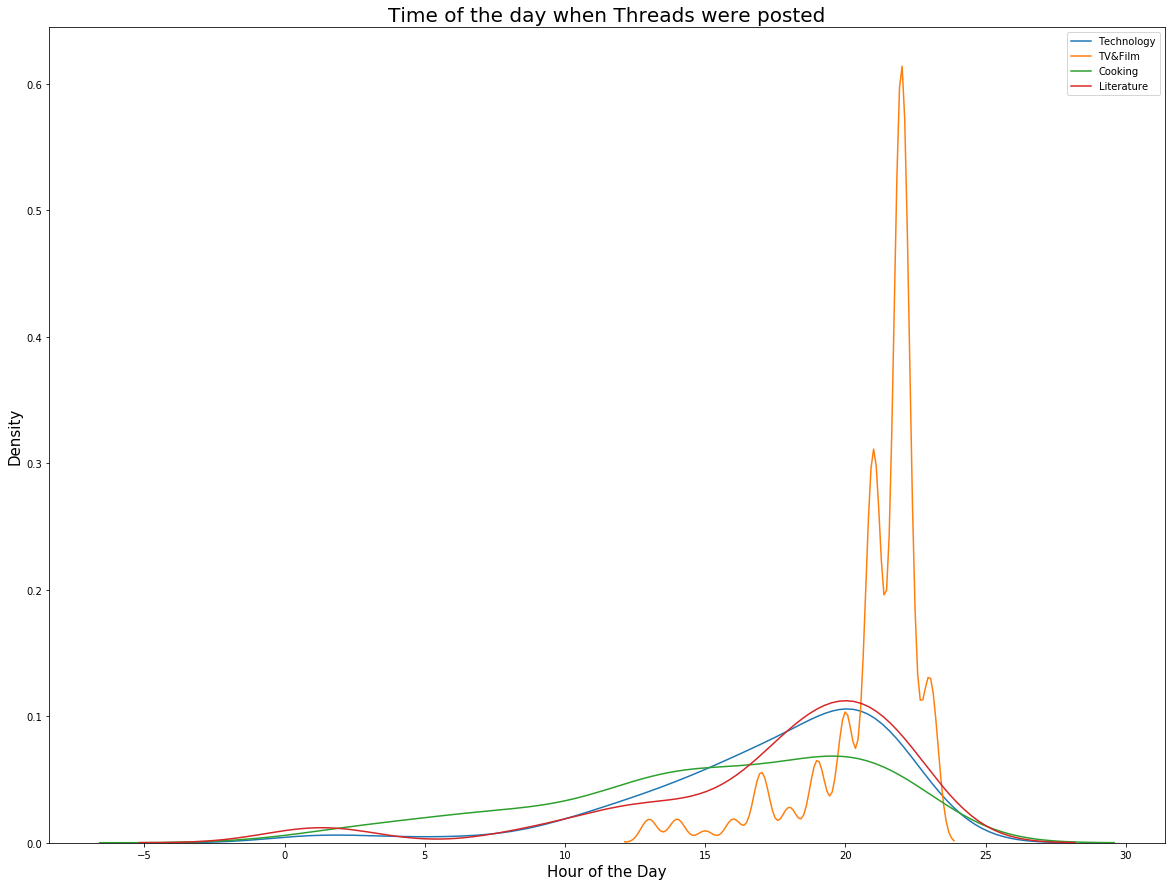

In [21]:
import seaborn as sns
fig = plt.figure(figsize=(20,15))
sns.kdeplot(full_df.loc[full_df['channel'] == 1, 'hour_of_the_day'], label = 'Technology')
sns.kdeplot(full_df.loc[full_df['channel'] == 2, 'hour_of_the_day'], label = 'TV&Film')
sns.kdeplot(full_df.loc[full_df['channel'] == 3, 'hour_of_the_day'], label = 'Cooking')
sns.kdeplot(full_df.loc[full_df['channel'] == 4, 'hour_of_the_day'], label = 'Literature');
plt.xlabel('Hour of the Day',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Time of the day when Threads were posted',fontsize=20)

The most discernable graph of the four is that of Films and TV. Most of the original threads were posted from 6pm till mid night. Cooking posts are pretty much even thoughout the day. Literature and Technology posts are increase as the day goes by. 
The reason for the increase in the TV and Films posts in the evening may be because people are watching TV shows and Films after office hours and they want to share their opinions with others.

In [22]:
full_df.tail()

,thread_id,name,original_post,time,num_replies,last_5_reply_text,bumplimit,channel,hour_of_the_day,num_words
593,15338816,Anonymous,has history ended,1589241372,1,history ended after the G rmoids were defeated...,0,4,19,3
594,15335983,Anonymous,any books that made you more mature and tranqu...,1589220652,40,Aesop 039 s fables didn 039 t make me more tra...,0,4,14,17
595,15338231,Anonymous,undescribable,1589237401,5,15338448 No quantity is a quantity,0,4,18,1
596,15338169,Anonymous,any books on radical neonihilism,1589236906,1,15338169 The Talmud,0,4,18,5
597,15333962,Anonymous,In strange room you must empty yourself for...,1589203676,27,15338295 15338366,0,4,09,233


Text(0, 0.5, 'Number of Replies')

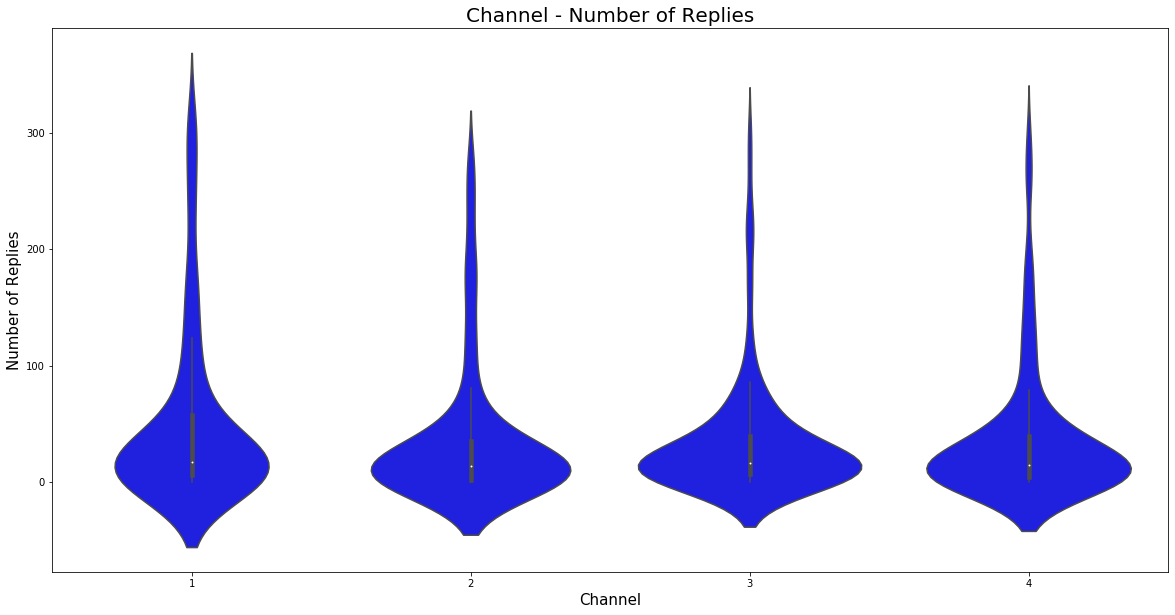

In [23]:
fig = plt.figure(figsize=(20,10))
sns.violinplot(x="channel",y="num_replies",data=full_df, color='blue')
plt.title("Channel - Number of Replies", fontsize=20)
plt.xlabel("Channel", fontsize=15)
plt.ylabel("Number of Replies", fontsize=15)

There is not much difference in average number of replies when all the channels are compared. However the spread of the replies of Technology posts is high. 

In [24]:
#Very less variation in bumplimit
full_df['bumplimit'].value_counts()

0    594
       2
1      2
Name: bumplimit, dtype: int64

In [25]:
#Very less variation in names
full_df['name'].value_counts()

Anonymous           592
chr21328              1
New kid on block      1
no                    1
Name                  1
Virgílio Nagase       1
Bobby Joe             1
Name: name, dtype: int64

In [26]:
#Combined both the original post and its replies to get more words in a channel
full_df['text'] = full_df['original_post'].str.cat(full_df['last_5_reply_text'],sep=" ")
full_df_copy = full_df
full_df.dtypes

thread_id             int64
name                 object
original_post        object
time                  int64
num_replies           int64
last_5_reply_text    object
bumplimit            object
channel               int64
hour_of_the_day      object
num_words             int64
text                 object
dtype: object

In [27]:
full_df.dtypes

thread_id             int64
name                 object
original_post        object
time                  int64
num_replies           int64
last_5_reply_text    object
bumplimit            object
channel               int64
hour_of_the_day      object
num_words             int64
text                 object
dtype: object

In [28]:
#Converted 'hour_of the_day the threat started' into 'int' type
full_df['hour_of_the_day'] = full_df['hour_of_the_day'].astype(str).astype(int)
full_df.dtypes

thread_id             int64
name                 object
original_post        object
time                  int64
num_replies           int64
last_5_reply_text    object
bumplimit            object
channel               int64
hour_of_the_day       int32
num_words             int64
text                 object
dtype: object

In [29]:
#Divided hour of the day into peak hour that is evening 6-12 and non-peak i.e. rest of the day
filter = (full_df['hour_of_the_day'] >=16)&(full_df['hour_of_the_day'] <=21)
full_df.loc[filter, 'timeofday'] = 'peak'
full_df.fillna('non_peak', inplace=True)

full_df.head()

,thread_id,name,original_post,time,num_replies,last_5_reply_text,bumplimit,channel,hour_of_the_day,num_words,text,timeofday
0,51971506,Anonymous,The Wiki is NOT your personal tech support t...,1450659832,1,,,1,20,72,The Wiki is NOT your personal tech support t...,peak
1,75866346,Anonymous,What steps are you taking to stop the botnet...,1589252391,1,75866346 why does he pronounce gnu linux li...,0,1,22,193,What steps are you taking to stop the botnet...,non_peak
2,75863189,Anonymous,What is the best DAW in your opinion and why P...,1589235727,17,75863189,0,1,18,59,What is the best DAW in your opinion and why P...,peak
3,75865748,Anonymous,Laptop sticker thread post em bois,1589248902,14,75865883 Unironically kill yourself you gin...,0,1,22,6,Laptop sticker thread post em bois 75865883...,non_peak
4,75862534,Anonymous,Installation Scripts quality video output prof...,1589232398,22,Wo having branded the manual letter by letter ...,0,1,17,43,Installation Scripts quality video output prof...,peak


In [30]:
#dropped unimportant features
full_df.drop([    'thread_id',
             'name',
             'original_post',
             'time',
             'bumplimit' , 'last_5_reply_text', 'hour_of_the_day'        
             ], axis=1, inplace=True)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import nltk

#Label encoded time of the day(peak as 1 and non-peak as 0)
le = LabelEncoder()
full_df['timeofday'] = le.fit_transform(full_df['timeofday'].values.ravel())
full_df.head()

,num_replies,channel,num_words,text,timeofday
0,1,1,72,The Wiki is NOT your personal tech support t...,1
1,1,1,193,What steps are you taking to stop the botnet...,0
2,17,1,59,What is the best DAW in your opinion and why P...,1
3,14,1,6,Laptop sticker thread post em bois 75865883...,0
4,22,1,43,Installation Scripts quality video output prof...,1


In [80]:
#dataframe was split into test and training dataset
y = full_df['channel']
X = full_df.drop('channel',axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [33]:
#Log Loss and Accuracy were considered as the metrics for eveluation
#Accuracy merely shows how many of our predictions are right but logloss 
#shows how much our model is correct in comparison with the correct labels of the class
def evaluate_features(X, y, clf=None):
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
   


In [64]:
#A simple Bag of Words vectorizer
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None) 
bag_of_words = count_vectorizer.fit_transform(x_train['text'])

In [65]:
len(count_vectorizer.get_feature_names())

5715

In [66]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_bag_of_words = svd.fit_transform(bag_of_words)

In [67]:
evaluate_features(truncated_bag_of_words, y_train.values.ravel())

#The evaluation results aren't very good. 
#The accuracy is low and The log loss is too high. But its good for a base model. 
#This result is for just the vectorized text. other features are not used. We may get a 
#better result if we use other features as well

Log loss: 1.193454718831437
Accuracy: 0.497907949790795


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning:

The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [75]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize, 
    preprocessor=None, stop_words='english', max_features=None)    

tfidf = count_vectorizer.fit_transform(x_train['text'])

len(count_vectorizer.get_feature_names())
tfidf

<478x5715 sparse matrix of type '<class 'numpy.float64'>'
	with 11928 stored elements in Compressed Sparse Row format>

In [76]:
svd = TruncatedSVD(n_components=25, n_iter=50, random_state=42)
truncated_tfidf = svd.fit_transform(tfidf)

In [82]:
evaluate_features(truncated_tfidf, y_train.values.ravel())

#The evaluation results slightly better than before. 
#The accuracy increased but the log loss is still too high. But its good for a base model.
# The better result is understandable as Counter Vectoizer counts and gives 
#the word frequency but the TD-IDF adjusts for the fact that some words appear frequently and penalizes it.
#This result is for just the vectorized text. other features are not used. We may get a 
#better result if we use other features as well
#Many other models such as Neural Net, Ensemble models with hyper parametric tuninf can be tried to improve the scores.
#The best model should be chosen on the basis of the results on the test dataset, 
#Since I haven't done other models. I didnot try to validate my results.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning:

The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Log loss: 1.209138501212566
Accuracy: 0.6359832635983264


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
